In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.transforms as transforms
import os

In [40]:
df = pd.read_csv('xp_model.csv')

In [41]:
leaderboard = df.groupby(['player', 'team_name']).agg(
    total_passes=('success', 'count'),
    total_pax=('PAx', 'sum')
).reset_index()

In [42]:
leaderboard = leaderboard[leaderboard['total_passes'] >= 50]

In [43]:
leaderboard['pax_per_100'] = (leaderboard['total_pax'] / leaderboard['total_passes']) * 100

In [44]:
leaderboard['pax_per_100'] = leaderboard['pax_per_100'].round(2)

In [45]:
leaderboard.head()

,player,team_name,total_passes,total_pax,pax_per_100
6,Aitor Fernández Abarisketa,Levante UD,64,0.495678,0.77
15,Alejandro Fernández Iglesias,Cádiz,50,-2.844501,-5.69
16,Alejandro Moreno Lopera,Real Betis,90,0.694579,0.77
17,Alejandro Remiro Gargallo,Real Sociedad,68,5.068828,7.45
22,Ander Capa Rodríguez,Athletic Club,90,-1.993201,-2.21


In [46]:
top_5 = leaderboard.nlargest(5, 'pax_per_100').sort_values('pax_per_100', ascending=True)
bottom_5 = leaderboard.nsmallest(5, 'pax_per_100').sort_values('pax_per_100', ascending=False)

In [47]:
plot_data = pd.concat([bottom_5, top_5])

/tmp/ipykernel_4481/799015263.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels)


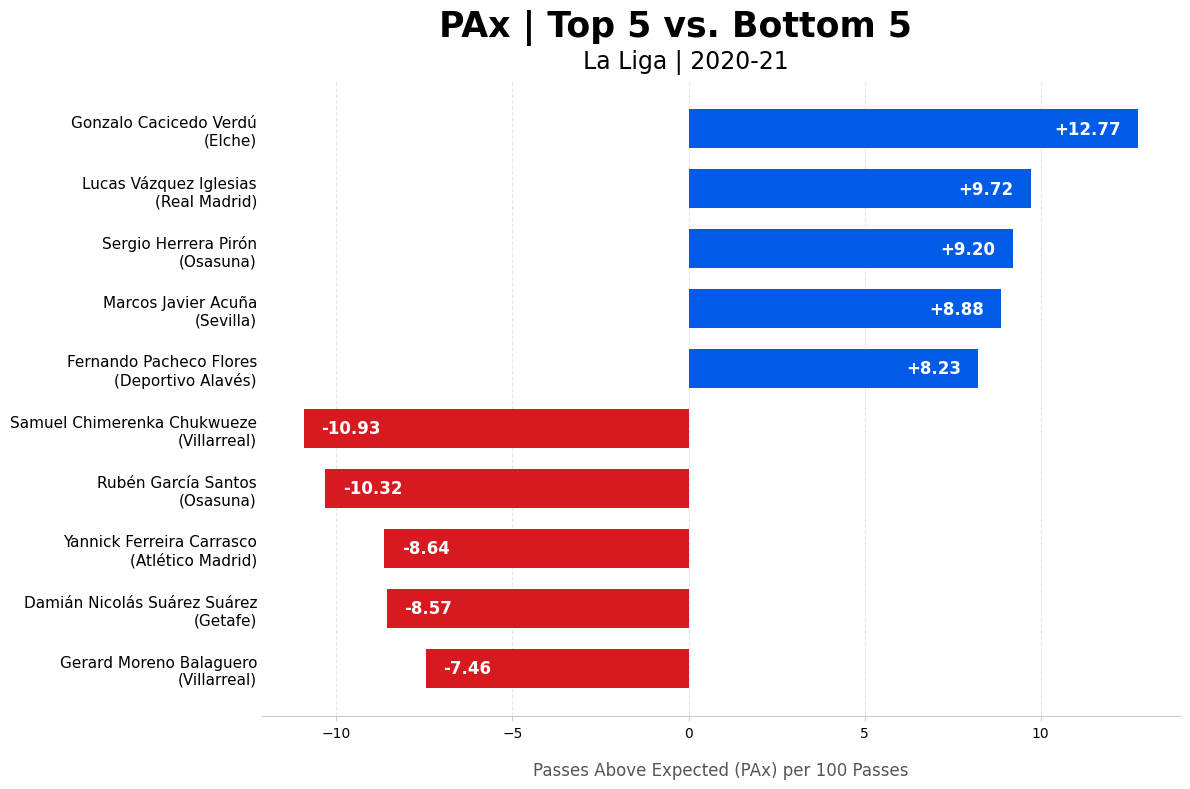

In [89]:
colors = ["#005CE6" if x > 0 else '#D71920' for x in plot_data['pax_per_100']]

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(plot_data['player'], plot_data['pax_per_100'], color=colors, height=0.65)

for bar, value in zip(bars, plot_data['pax_per_100']):
    # Determine padding inside the bar
    # If positive, we go slightly left of the end. If negative, slightly right of the end.
    offset = 0.5  # How far inside the bar the text sits
    
    if value >= 0:
        label_x = value - offset
        alignment = 'right' # Anchor text to the right so it flows into the bar
    else:
        label_x = value + offset
        alignment = 'left'  # Anchor text to the left so it flows into the bar

    ax.text(label_x, bar.get_y() + bar.get_height()/2, 
            f'{value:+.2f}', 
            va='center', 
            ha=alignment, 
            fontsize=12, 
            fontweight='bold', 
            color='white')
    
new_labels = [f"{row.player}\n({row.team_name})" for i, row in plot_data.iterrows()]
ax.set_yticklabels(new_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#CCCCCC')
ax.spines['left'].set_visible(False)

ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

plt.title('PAx | Top 5 vs. Bottom 5', fontsize=25, fontweight='bold', loc='center',x=0.45, pad=32)
plt.text(x=0.35, y=1.02, s='La Liga | 2020-21',fontsize=17,color="#000000",transform=ax.transAxes)
plt.xlabel('Passes Above Expected (PAx) per 100 Passes', fontsize=12, labelpad=15, color='#555555')

ax.tick_params(axis='y', length=0, labelsize=11)
ax.tick_params(axis='x', labelsize=10, color='#CCCCCC')

plt.tight_layout()
plt.show()



